#Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading datset

In [3]:
loan_data= pd.read_csv(r"D:\Machine\loan_data_set.csv")
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Checking for null value and getting data info

In [4]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#View data

In [7]:
loan_data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
loan_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

#Filling Empty Values

In [9]:
#filling categorical value

loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Education'] = loan_data['Education'].fillna(loan_data['Education'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])




In [10]:
# loan_data.isnull().sum()

In [11]:
#filling numerical data

loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())




#Analysis of Data and outlier detection

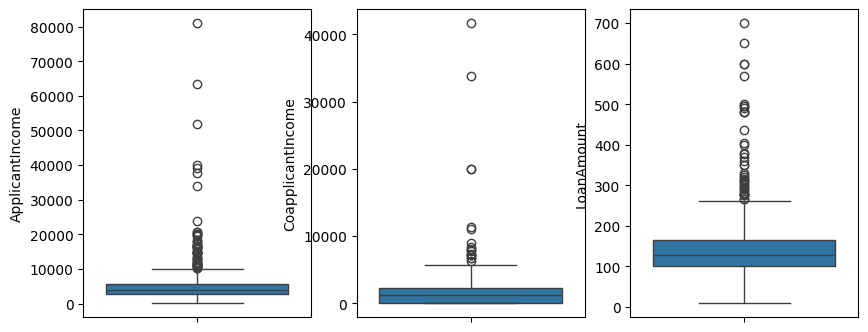

In [12]:
plt.figure(figsize=[10,4])

plt.subplot(1,3,1)
sns.boxplot(loan_data["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(loan_data["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(loan_data["LoanAmount"])


plt.show()



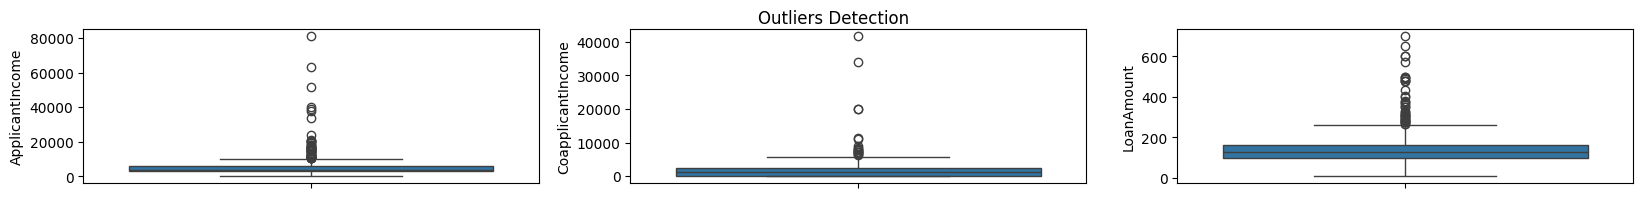

In [13]:
plt.figure(figsize=(20,2))

plt.subplot(1, 3, 1)
sns.boxplot(loan_data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(loan_data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(loan_data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [15]:
print("Before removing the outliers", loan_data.shape)

loan_data=loan_data[loan_data["ApplicantIncome"]<25000]

print("After removing the outliers", loan_data.shape)


Before removing the outliers (614, 13)
After removing the outliers (607, 13)


In [16]:
print("Before removing the outliers", loan_data.shape)

loan_data=loan_data[loan_data["CoapplicantIncome"]<12000]

print("After removing the outliers", loan_data.shape)


Before removing the outliers (607, 13)
After removing the outliers (603, 13)


In [17]:
print("Before removing the outliers", loan_data.shape)

loan_data=loan_data[loan_data["LoanAmount"]<400]

print("After removing the outliers", loan_data.shape)


Before removing the outliers (603, 13)
After removing the outliers (591, 13)


ANALYSIS

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3349851634.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["ApplicantIncome"],color="green")
C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3349851634.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["Coapplica

<Axes: xlabel='LoanAmount', ylabel='Density'>

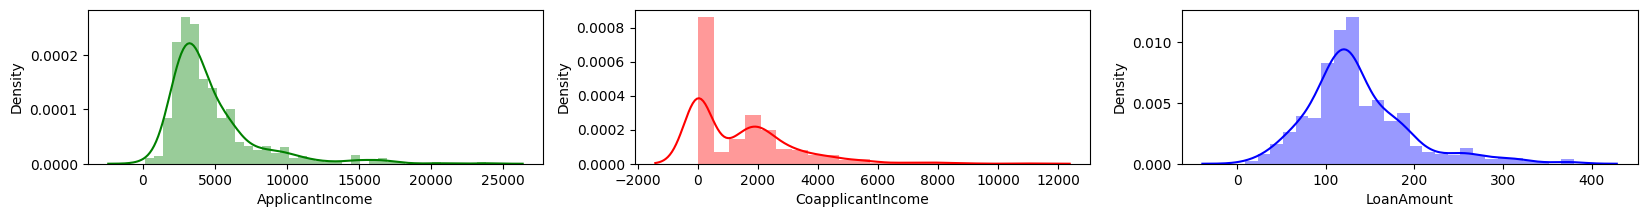

In [18]:
plt.figure(figsize=(20,2))

plt.subplot(1,3,1)
sns.distplot(loan_data["ApplicantIncome"],color="green")

plt.subplot(1,3,2)
sns.distplot(loan_data["CoapplicantIncome"],color="red")

plt.subplot(1,3,3)
sns.distplot(loan_data["LoanAmount"],color="blue")




C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3870448475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["ApplicantIncome"],color="green")
C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3870448475.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data["Coapplica

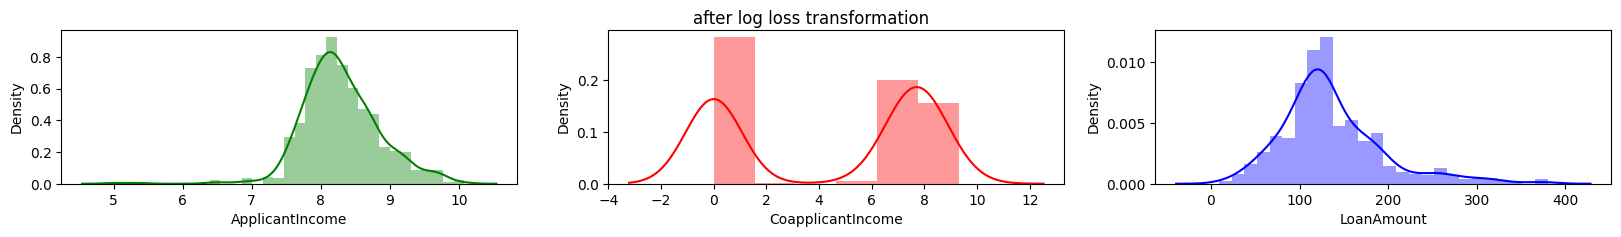

In [19]:
loan_data['ApplicantIncome'] = np.log(loan_data['ApplicantIncome'])
loan_data['CoapplicantIncome'] = np.log1p(loan_data['CoapplicantIncome'])

plt.figure(figsize=(20,2))
plt.subplot(1,3,1)
sns.distplot(loan_data["ApplicantIncome"],color="green")

plt.subplot(1,3,2)
sns.distplot(loan_data["CoapplicantIncome"],color="red")

plt.subplot(1,3,3)
sns.distplot(loan_data["LoanAmount"],color="blue")

plt.suptitle("after log loss transformation")

plt.show()



In [20]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [21]:
num= loan_data.select_dtypes('number').columns.tolist()
cat= loan_data.select_dtypes('object').columns.tolist()

In [23]:
num,cat

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

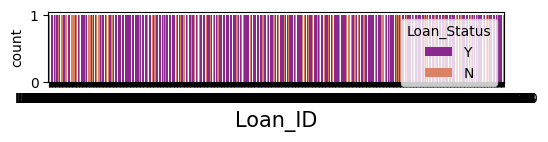

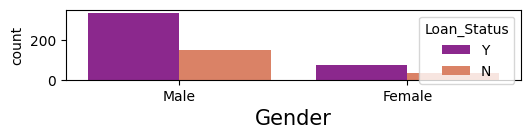

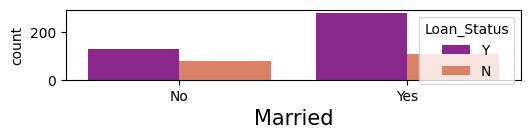

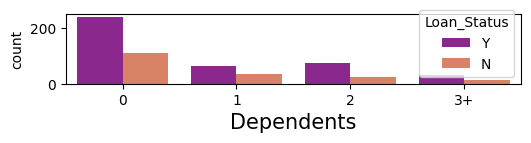

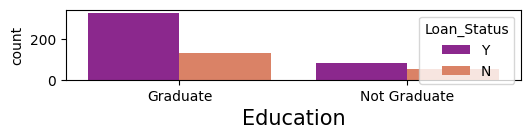

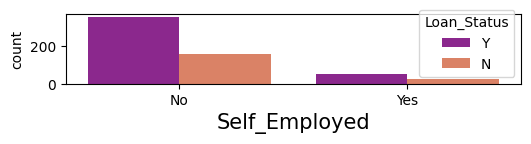

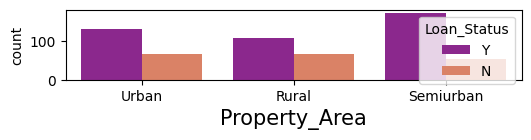

In [25]:
for i in cat[:-1]:
    plt.figure(figsize=(20,2))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue='Loan_Status',data=loan_data, palette='plasma')
    plt.xlabel(i,fontsize=15)

#TARGET DATA

In [26]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
print(pd.crosstab(loan_data['Loan_Status'],loan_data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [28]:
print(pd.crosstab(loan_data['Loan_Status'],loan_data['Education']))


Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [29]:
print(pd.crosstab(loan_data['Loan_Status'],loan_data['Property_Area']))


Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [30]:
print(pd.crosstab(loan_data['Loan_Status'],loan_data['Self_Employed']))
print(pd.crosstab(loan_data['Loan_Status'],loan_data['Gender']))



Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51
Gender       Female  Male
Loan_Status              
N                36   147
Y                73   335


In [31]:
# data preparatrion

In [32]:
loan_data.select_dtypes('object').head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y


In [33]:
data = loan_data.drop(['Loan_ID'], axis = 1)

In [34]:
loan_data.drop("Loan_ID",axis=1,inplace=True)
loan_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y


DATA PREPARATION

In [35]:
loan_data['Gender'] = loan_data['Gender'].replace(('Male','Female'),(1,0))
loan_data['Married'] = loan_data['Married'].replace(('Yes','No'),(1,0))


C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3945190400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['Gender'] = loan_data['Gender'].replace(('Male','Female'),(1,0))
C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\3945190400.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['Married'] = loan_data['Married'].replace(('Yes','No'),(1,0))


In [36]:
loan_data['Education'] = loan_data['Education'].replace(('Graduate','Not Graduate'),(1,0))
loan_data['Self_Employed'] = loan_data['Self_Employed'].replace(('Yes','No'),(1,0))
loan_data['Loan_Status'] = loan_data['Loan_Status'].replace(('Y','N'),(1,0))
loan_data['Property_Area'] = loan_data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))

loan_data['Dependents'] = loan_data['Dependents'].replace(('1','2','3+','0'),(1,1,1,0))

C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\4120749555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['Education'] = loan_data['Education'].replace(('Graduate','Not Graduate'),(1,0))
C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\4120749555.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['Self_Employed'] = loan_data['Self_Employed'].replace(('Yes','No'),(1,0))
C:\Users\VAISHNAVI\AppData\Local\Temp\ipykernel_2920\4120749555.py:3: FutureWarning: Downcasting behavior in `replace` is depreca

In [37]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [38]:
x=loan_data.iloc[:,:-1]
y=loan_data['Loan_Status']

In [40]:
x.shape,y.shape

((591, 11), (591,))

In [41]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [44]:
y.value_counts()
y.shape

(591,)

HANDLING IMBALANCE DATASET

In [45]:
#handling imbalance dataset

from imblearn.over_sampling import SMOTE


In [46]:
x_resample,y_resample=SMOTE().fit_resample(x,y.values.ravel())

In [47]:
x_resample.shape,y_resample.shape

((816, 11), (816,))

In [48]:
#train test split
loan_data.shape

(591, 12)

#TRAIN TEST SPLIT 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=30)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((652, 11), (164, 11), (652,), (164,))

MODEL BUILDING USING LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr=LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
lr.fit(x_train, y_train)


c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr.score(x_train,y_train)*100

78.83435582822086

In [57]:
lr.score(x_test,y_test)*100

74.39024390243902

In [58]:
print("Traning Accuracy",lr.score(x_train, y_train)*100)
print("Test Accuracy", lr.score(x_test, y_test)*100)

Traning Accuracy 78.83435582822086
Test Accuracy 74.39024390243902


In [59]:
y_pred = lr.predict(x_test)

#Confusion metrics

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.63      0.73        91
           1       0.66      0.89      0.76        73

    accuracy                           0.74       164
   macro avg       0.77      0.76      0.74       164
weighted avg       0.78      0.74      0.74       164



In [62]:
print("Our Model Accuracy is",accuracy_score(y_pred, y_test)*100)


Our Model Accuracy is 74.39024390243902


PREDICTION

In [63]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [64]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [65]:
prediction = lr.predict(model_pred)
print(prediction[0])

0


c:\Users\VAISHNAVI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [66]:
import pickle